In [5]:
#import libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [6]:
#load preprocessed data
df_preprocessed = pd.read_csv("house_prices_processed.csv")

X = df_preprocessed.drop("Price (in rupees)", axis=1)
y = df_preprocessed["Price (in rupees)"]

In [7]:
#load preprocessor
preprocessor = joblib.load('preprocessor.pkl')


In [8]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (141668, 13)
Testing set: (35418, 13)


In [9]:
# Transform the features using the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print(f"Transformed training features: {X_train_transformed.shape}")
print(f"Transformed testing features: {X_test_transformed.shape}")

Transformed training features: (141668, 125)
Transformed testing features: (35418, 125)


In [11]:
# Initialize and train Decision Tree
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,  # Limit depth to prevent overfitting
    min_samples_split=20,
    min_samples_leaf=10
)

dt_model.fit(X_train_transformed, y_train)
print("Decision Tree model training completed!")

Decision Tree model training completed!


In [13]:
# Make predictions
y_pred_dt_train = dt_model.predict(X_train_transformed)
y_pred_dt = dt_model.predict(X_test_transformed)

In [17]:
# Evaluate Decision Tree
dt_mae_train = mean_absolute_error(y_train, y_pred_dt_train)
dt_mse_train = mean_squared_error(y_train, y_pred_dt_train)
dt_rmse_train = np.sqrt(dt_mse_train)
dt_r2_train = r2_score(y_train, y_pred_dt_train)

print("Decision Tree Train Results:")
print(f"Train MAE: {dt_mae_train:.2f}")
print(f"Train MSE: {dt_mse_train:.2f}")
print(f"Train RMSE: {dt_rmse_train:.2f}")
print(f"Train R² Score: {dt_r2_train:.4f}")

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Test Results:")
print(f"Test MAE: {dt_mae:.2f}")
print(f"Test MSE: {dt_mse:.2f}")
print(f"Test RMSE: {dt_rmse:.2f}")
print(f"Test R² Score: {dt_r2:.4f}")

Decision Tree Train Results:
Train MAE: 948.79
Train MSE: 2269825.27
Train RMSE: 1506.59
Train R² Score: 0.7073

Decision Tree Test Results:
Test MAE: 961.06
Test MSE: 2360875.10
Test RMSE: 1536.51
Test R² Score: 0.6960


In [19]:
# Feature Importance Analysis for Decision Tree
# Get feature names after preprocessing
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(features)
    elif name == 'cat':
        # Get one-hot encoded feature names
        cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(features)
        feature_names.extend(cat_features)

# Decision Tree Feature Importance
dt_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features (Decision Tree):")
print(dt_importance_df.head(15))

Top 15 Most Important Features (Decision Tree):
                      feature  importance
0                 Carpet Area    0.254901
5                total_floors    0.168081
56         location_new-delhi    0.139188
29           location_gurgaon    0.078785
1                    Bathroom    0.057431
2                     Balcony    0.046723
4               current_floor    0.043439
12         location_bangalore    0.027973
33         location_hyderabad    0.022763
3                 Car Parking    0.018277
42           location_kolkata    0.017125
93  Furnishing_Semi-Furnished    0.016697
97        facing_North - East    0.014674
98        facing_North - West    0.012798
19           location_chennai    0.012219


C:\Users\Admin\AppData\Local\Temp\ipykernel_14112\2125578471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dt_importance_df.head(15), y='feature', x='importance', palette='viridis')


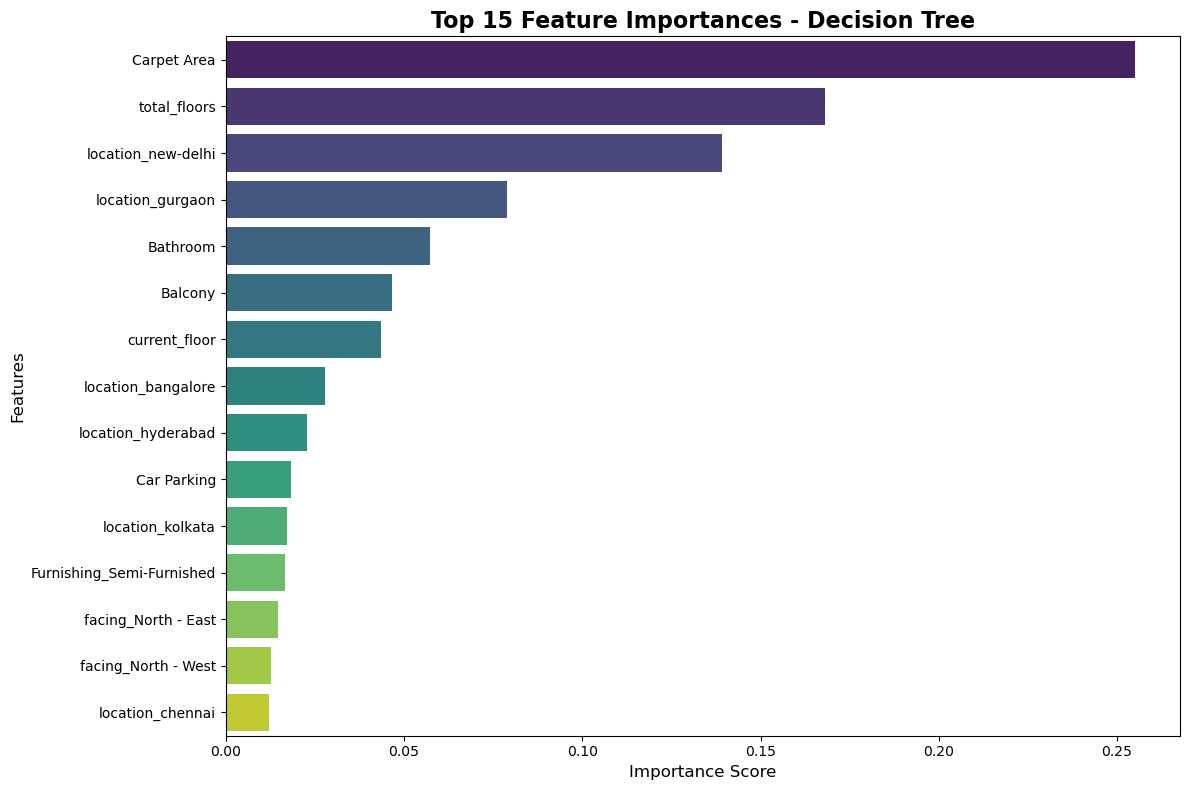

In [20]:
# Plot Decision Tree Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(data=dt_importance_df.head(15), y='feature', x='importance', palette='viridis')
plt.title('Top 15 Feature Importances - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [21]:
# Save Decision Tree model
joblib.dump(dt_model, 'decision_tree_model.pkl')
print("\nDecision Tree model saved as 'decision_tree_model.pkl'")


Decision Tree model saved as 'decision_tree_model.pkl'


In [22]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=15,
    min_samples_split=15,
    min_samples_leaf=5,
    n_jobs=-1  # Use all available cores
)
rf_model.fit(X_train_transformed, y_train)
print("Random Forest model training completed!")

Random Forest model training completed!


In [23]:
# Make predictions
y_pred_rf_train = rf_model.predict(X_train_transformed)
y_pred_rf = rf_model.predict(X_test_transformed)

In [24]:
# Evaluate Random Forest
rf_mae_train = mean_absolute_error(y_train, y_pred_rf_train)
rf_mse_train = mean_squared_error(y_train, y_pred_rf_train)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_r2_train = r2_score(y_train, y_pred_rf_train)

print("Random Forest Train Results:")
print(f"Train MAE: {rf_mae_train:.2f}")
print(f"Train MSE: {rf_mse_train:.2f}")
print(f"Train RMSE: {rf_rmse_train:.2f}")
print(f"Train R² Score: {rf_r2_train:.4f}")

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Test Results:")
print(f"Test MAE: {rf_mae:.2f}")
print(f"Test MSE: {rf_mse:.2f}")
print(f"Test RMSE: {rf_rmse:.2f}")
print(f"Test R² Score: {rf_r2:.4f}")


Random Forest Train Results:
Train MAE: 750.06
Train MSE: 1612269.55
Train RMSE: 1269.75
Train R² Score: 0.7921

Random Forest Test Results:
Test MAE: 773.84
Test MSE: 1737969.98
Test RMSE: 1318.32
Test R² Score: 0.7762


In [25]:
# Feature Importance Analysis for Random Forest
# Get feature names after preprocessing (if not already defined)
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(features)
    elif name == 'cat':
        # Get one-hot encoded feature names
        cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(features)
        feature_names.extend(cat_features)

# Random Forest Feature Importance
rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features (Random Forest):")
print(rf_importance_df.head(15))

Top 15 Most Important Features (Random Forest):
                      feature  importance
0                 Carpet Area    0.221238
5                total_floors    0.157693
56         location_new-delhi    0.132599
29           location_gurgaon    0.075793
1                    Bathroom    0.060864
4               current_floor    0.054565
2                     Balcony    0.050038
12         location_bangalore    0.027028
42           location_kolkata    0.023455
33         location_hyderabad    0.021084
93  Furnishing_Semi-Furnished    0.018283
3                 Car Parking    0.016233
19           location_chennai    0.012238
97        facing_North - East    0.011839
98        facing_North - West    0.009482


C:\Users\Admin\AppData\Local\Temp\ipykernel_14112\3339980207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df.head(15), y='feature', x='importance', palette='plasma')


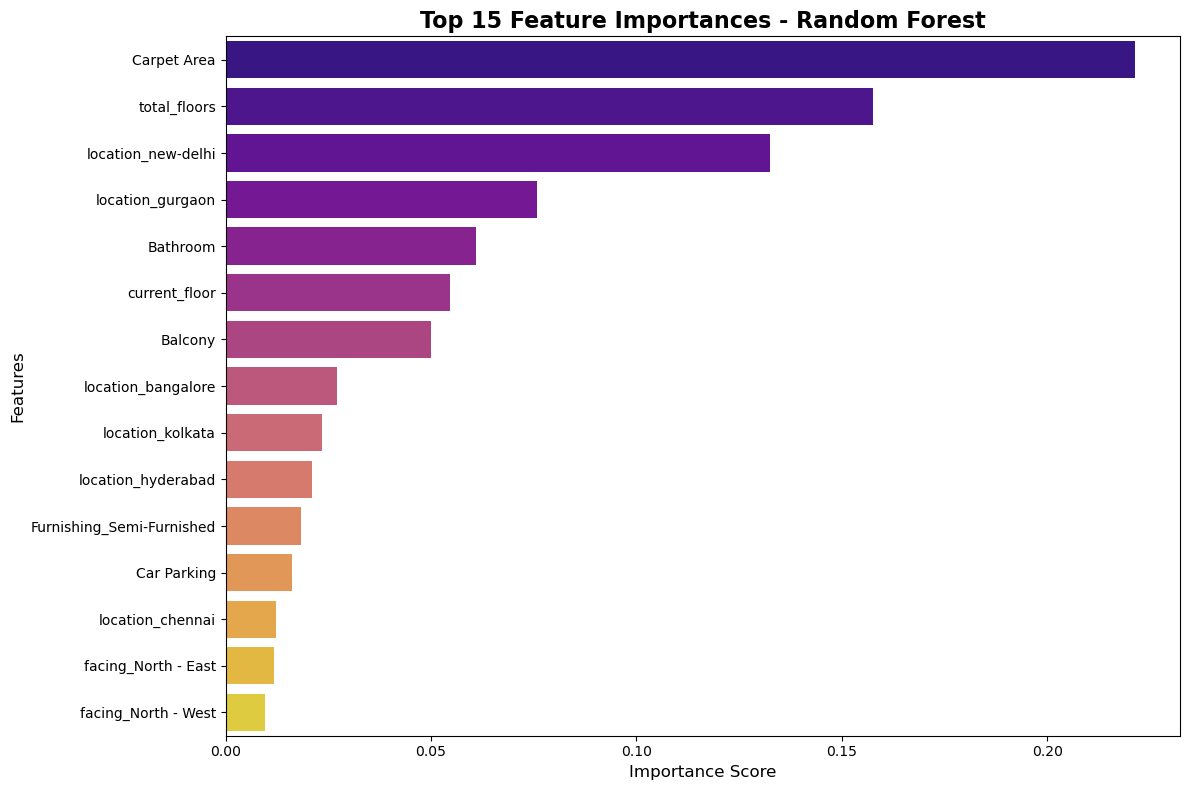

In [26]:
# Plot Random Forest Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(data=rf_importance_df.head(15), y='feature', x='importance', palette='plasma')
plt.title('Top 15 Feature Importances - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
# Save Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("\nRandom Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'
